# Who will survive in Titanic?

When the Titanic sank, 1502 of the 2224 passengers and crew were killed. One of the main reasons for this high level of casualties was the lack of lifeboats on this self-proclaimed "unsinkable" ship. Those who have seen the movie know that some individuals were more likely to survive the sinking than others. In this work we will study the passengers data and apply machine learning techniques to predict a passenger's chance of surviving based on their infomration.

##  Explore the Data 

In order to explore which parameters contribute to the survival, let's first have a look at the data we got. 

In this work we will import the csv into pandas, so before we import the file, we need to load the libraries that we will need later.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")
train.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


We can see that the "PassengerID" is just the continuous ID of the passenger, which doesn't contain any information to the analysis, another column "Name" contains the strings of the passengers but also doens't help with the analysis, so we will delete this two columns later when we do the feature engineering.

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


According to this information, the Column "Cabin" contains only 204 values, which means it has 891-204 = 687 missing values. This is very big amount for the missing value, so we will also delete "Cabin" column later.

In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above is a summary of the data from the Titanic. The dataset includes 891 passengers, recorded with their survival information and other features like Sex and age. 

## Explore each Features

We've explored the whole table of the passengers, and found some tricky features that can be removed. Now let's check the feature more detailed.

### Survived

In [5]:
print ("There are unique values of survived column: {}".format(train['Survived'].unique()))
print ("Among all the train data there are {} people survived".format(sum(train['Survived'])))
print ("Among these there are {} missing values".format(train["Survived"].isnull().sum()))

There are unique values of survived column: [0 1]
Among all the train data there are 342 people survived
Among these there are 0 missing values


We can see that there are only 0 and 1 for Survived, which is easy to understand. Among the whole "train" group there are 342 

### Pclass

In [6]:
print ("There are unique values of Pclass column: {}".format(train['Pclass'].unique()))
print ("Among these there are {} missing values".format(train["Pclass"].isnull().sum()))

There are unique values of Pclass column: [3 1 2]
Among these there are 0 missing values


In [7]:
def cross_plt(feat):
    pay_xt = pd.crosstab(train[feat], train['Survived'])
    pay_xt.plot(kind='bar', 
                   stacked=True, 
                   title= feat + 'v.s. Survived', color = ['gray', 'green'], alpha = 0.65)
    return pay_xt

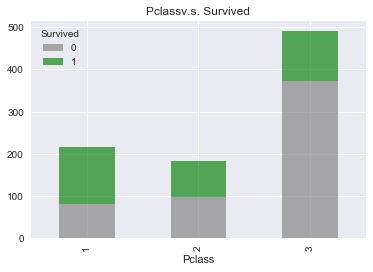

In [8]:
pclass = cross_plt('Pclass')

In [9]:
pclass

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [10]:
pclass.sum(1)

Pclass
1    216
2    184
3    491
dtype: int64

In [11]:
pclass[1]/pclass.sum(1)

Pclass
1    0.629630
2    0.472826
3    0.242363
dtype: float64

It has very clear trend that among the three different classes, Pclass 1 has the highest survival rate of 63.0%, Pclass 2 has higher rate than Pclass 3. In this case we can conclude that Pclass is an important parameter.

**Pclass contributes to the survival rate.**

Among the three different classes, Pclass 1 has the highest survival rate of 63.0%, Pclass 2 has higher rate than Pclass 3. In this case we can conclude that Pclass is an important parameter.

### Sex

In [12]:
print ("There are unique values of Pclass column: {}".format(train['Sex'].unique()))
print ("Among these there are {} missing values".format(train["Sex"].isnull().sum()))

There are unique values of Pclass column: ['male' 'female']
Among these there are 0 missing values


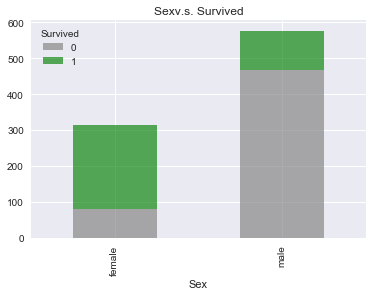

In [13]:
sex_xt = cross_plt("Sex")

In [14]:
print (sex_xt,'\n')
print (sex_xt.iloc[:,1]/sex_xt.sum(1))

Survived    0    1
Sex               
female     81  233
male      468  109 

Sex
female    0.742038
male      0.188908
dtype: float64


It has very clear trend that male has much lower survival rate than female, so the Sex shall be also a very important feature. Female has much higher survival rate (74.2%) than Male(18.9%).

### Ticket

In [15]:
print ("There are {} unique values of Pclass column.".format(len(train['Ticket'].unique())))
print ("Among these there are {} missing values".format(train["Ticket"].isnull().sum()))

There are 681 unique values of Pclass column.
Among these there are 0 missing values


In [16]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

The ticket column has 681 different string values, which is quite a messy data, so we will leave this feature alone at this moment.

### Embarked

In [17]:
print ("There are unique values of Pclass column:{}.".format(train['Embarked'].unique()))
print ("Among these there are {} missing values".format(train["Embarked"].isnull().sum()))
print (train["Embarked"].value_counts())

There are unique values of Pclass column:['S' 'C' 'Q' nan].
Among these there are 2 missing values
S    644
C    168
Q     77
Name: Embarked, dtype: int64


Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217 

Embarked
C    0.553571
Q    0.389610
S    0.336957
dtype: float64


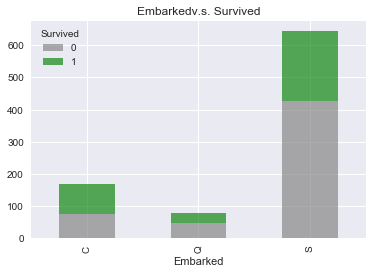

In [18]:
ebk_xt = cross_plt("Embarked")
print (ebk_xt, '\n')
print (ebk_xt.iloc[:,1]/(ebk_xt.sum(1)))

The rate for each Embarked value are quite close, and the Q value has much less data points than the other. So we can not get too much information so far. Let's come back to this feature later.

##  Age: Do elder people have higher survival rate or lower?  ##

In [19]:
print ("There are {} empty value for Age group.".format(train["Age"].isnull().sum()))
print ("Total population is: ", len(train))

There are 177 empty value for Age group.
Total population is:  891


In [20]:
def age_range(age):
    if age <18:
        return "Child"
    elif age < 35:
        return "Youth"
    elif age < 60:
        return "Adult"
    else:
        return "Elder"

train["Age_group"] = train["Age"].apply(age_range)

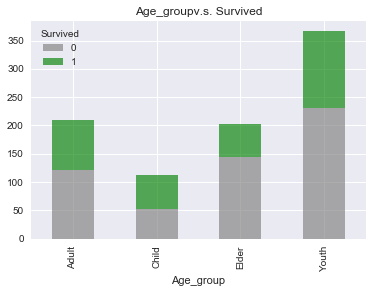

In [21]:
age_g = cross_plt('Age_group')

In [22]:
age_g

Survived,0,1
Age_group,,
Adult,122,87
Child,52,61
Elder,144,59
Youth,231,135


In [23]:
print ("Survival rate v.s. Age")
print (age_g[1]/age_g.sum(1))

Survival rate v.s. Age
Age_group
Adult    0.416268
Child    0.539823
Elder    0.290640
Youth    0.368852
dtype: float64


According to the survival rate simply grouped by **Age**, though the elder are lower than the others, but even NaN group has average survival rate. It's hard to get any conclusion from this chart simply by grouping them into Age groups. 

In [24]:
train["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120234ac8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1202252e8>]], dtype=object)

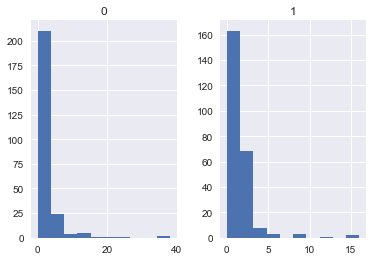

In [25]:
fare_xt = pd.crosstab(train["Fare"], train['Survived'])
fare_xt.hist()

According to the plot we could not get too much information. So we will come back to this faeture later.

## Feature selection
- Feature "Cabin" has only 204 records, the huge amount of missing value will not bring any information for the analysis, so this feature shall be dropped.
- Feauture "Name" and "PassengerID" as strings will not help with the analysisthus they shall be dropped as well.
- The tickets value are very confusing, this information will not bring value to the analysis either, so it shall be removed as well.
- There are 177 missing values for the Age, so the missing values will be replaced with average age.

It is very important that when we do any change to the Training data, we need to do the same on the test data. So before we do feature engineering, we shall combine the train and test data into one.

In [26]:
df = pd.concat([train,test])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
Age            1046 non-null float64
Age_group      891 non-null object
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


Now let's drop the features that we will not use. 

In [27]:
df = df.drop(['Ticket','Cabin','Name',"Age_group", "PassengerId" ], axis=1)

Now let's take a look at the data after dropping the features. There are only 8 feature left for the modeling.

In [28]:
df.head(5)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp,Survived
0,22.0,S,7.2500,0,3,male,1,0.0
1,38.0,C,71.2833,0,1,female,1,1.0
2,26.0,S,7.9250,0,3,female,0,1.0
3,35.0,S,53.1000,0,1,female,1,1.0
4,35.0,S,8.0500,0,3,male,0,0.0


Missing values will bring trouble to the modeling, thus we will fill in the missing values with the most common value of each feature.

In [29]:
df['Age'] = df['Age'].fillna(df['Age'].median())

There are only 2 missing values of "Embarked" feature, which will also be filled in the most common value "S"

In [30]:
df['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [31]:
df['Embarked'] = df['Embarked'].fillna('S')

There are only 1 missing values of "Fare" feature, which will also be filled in the mean value of the fare.

In [32]:
df['Fare'].isnull().sum()

1

In [33]:
df['Fare'] = df['Fare'].fillna(df['Fare'].median())

### Create new feature- Family Size
Though there are sibling, parents and children information, which will contributes to a new feature called "Family size", which includes the family size information.

In [34]:
df['family_size'] = df['SibSp'] + df['Parch']+1

### Transform Sex data.
There are only Male and Female in the Sex column, so we will transform this categorical data into 0 and 1.

In [35]:
df['Sex'] = pd.Categorical(df['Sex']).codes

### Transform feature Embarked data.
There are three categories of Embarked data, however the difference between the survival rate of them are not clear. Unlike the Sex column, if we transfer the three categories into 0,1 and 2, there will be a preference among each type. So we will transform this categorical data into three new columns Embarked_C, Embarked_Q and Embarked_S, each has only 0 and 1 value.

In [36]:
df['Embarked'].unique()
df = pd.get_dummies(df, columns = ['Embarked'])

## Machine Learning algorithms
Now we have made several changes to the features, let's look at the data again before we start implementing machine learning algorithms. 

In [37]:
df.head(20)

,Age,Fare,Parch,Pclass,Sex,SibSp,Survived,family_size,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.2500,0,3,1,1,0.0,2,0,0,1
1,38.0,71.2833,0,1,0,1,1.0,2,1,0,0
2,26.0,7.9250,0,3,0,0,1.0,1,0,0,1
3,35.0,53.1000,0,1,0,1,1.0,2,0,0,1
4,35.0,8.0500,0,3,1,0,0.0,1,0,0,1
5,28.0,8.4583,0,3,1,0,0.0,1,0,1,0
6,54.0,51.8625,0,1,1,0,0.0,1,0,0,1
7,2.0,21.0750,1,3,1,3,0.0,5,0,0,1
8,27.0,11.1333,2,3,0,0,1.0,3,0,0,1
9,14.0,30.0708,0,2,0,1,1.0,2,1,0,0


### Transfer the data back into Train and Test.
We've combined the two dataset into one, so that we did the transfer for each feature much easier. Now we need to split them again so that we can use the train data set. Note that there was no "Survived" column in the test data, so we need to remove it again.

In [38]:
# Split the df into the training data and the test data.
df_train = df.iloc[:train.shape[0], :]
df_test = df.iloc[train.shape[0]:, :]
df_test = df_test.drop('Survived',1)

Since the Survived column is what we are predicting, so we will use this column as a label, and the others as features.

In [39]:
labels = df_train["Survived"]
features = df_train.drop('Survived',1)
feats = [feat for feat in features]
print ("The feature list to be used in the machine learning:")
print (feats)

The feature list to be used in the machine learning:
['Age', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'family_size', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


## Cross-validation

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

## Creating Decision Tree

In [41]:
from sklearn import tree
parameters = {'min_samples_split':[3, 5, 7, 10],
               "min_impurity_split":[6e-07,5e-07,7e-07],
                "min_samples_leaf":[1,3, 5] , "random_state": [46]
             }
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
grid = GridSearchCV(tree.DecisionTreeClassifier(), param_grid=parameters, cv=cv)
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [3, 5, 7, 10], 'min_impurity_split': [6e-07, 5e-07, 7e-07], 'min_samples_leaf': [1, 3, 5], 'random_state': [46]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [42]:
print("The best parameters are {} with a score of {}".format(grid.best_params_, grid.best_score_))
estimator = grid.best_estimator_
pred = estimator.predict(df_test)
print ("The top features with highest scores for the classifier ")
for i, j  in enumerate(estimator.feature_importances_):
    if j >0.05:print (i,j , feats[i])

The best parameters are {'min_impurity_split': 6e-07, 'min_samples_leaf': 5, 'min_samples_split': 3, 'random_state': 46} with a score of 0.7753731343283582
The top features with highest scores for the classifier 
0 0.11308898718 Age
1 0.180712007442 Fare
3 0.162955952035 Pclass
4 0.440392306818 Sex


In [44]:
pred_tree = estimator.predict(df_test).astype(int)
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_tree, PassengerId, columns = ["Survived"])
my_solution.to_csv("solution/my_solution_tree.csv", index_label = ["PassengerId"])

The tree got a score of 0.775

## Random Forest 
 
Random Forest technique handles the overfitting problem you faced with decision trees. It grows multiple (very deep) classification trees using the training set. At the time of prediction, each tree is used to come up with a prediction and every outcome is counted as a vote. For example, if you have trained 3 trees with 2 saying a passenger in the test set will survive and 1 says he will not, the passenger will be classified as a survivor. 

In [51]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[100,50,200],
               "min_impurity_split":[6e-07,5e-07,7e-07],
                "min_samples_split":[2,4, 6] , "random_state": [42]
             }

cv = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=42)
grid = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv = cv)
grid.fit(features, labels)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.3,
            train_size=None),
       error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 50, 200], 'min_impurity_split': [6e-07, 5e-07, 7e-07], 'min_samples_split': [2, 4, 6], 'random_state': [42]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
print("The best parameters are %s with a score of %0.3f"
      % (grid.best_params_, grid.best_score_))

estimator = grid.best_estimator_
print ("The top features with highest scores for the classifier ")
for i, j  in enumerate(estimator.feature_importances_):
    if j >0.05:print (i,j , feats[i])

The best parameters are {'min_impurity_split': 6e-07, 'min_samples_split': 4, 'n_estimators': 100, 'random_state': 42} with a score of 0.796
The top features with highest scores for the classifier 
0 0.220475264731 Age
1 0.243082432942 Fare
3 0.0906145431887 Pclass
4 0.300055980732 Sex
6 0.0606580503512 family_size


In [47]:
pred_forest = estimator.predict(df_test).astype(int)
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])
my_solution.to_csv("solution/my_solution_forest.csv", index_label = ["PassengerId"])

The random forest got a score of 0.751, which is even lower than Decision Tree.

### Why does Decision Tree Outperform Random Forest?
Generally, ensemble models built on all variates can be better than their single submodels - but only if the submodels suffer from instability. One possible reason in this case will be due to that there're only few features, and none of the single tree in the random forest can capture the relation between the predictor variables.

In [48]:
from sklearn.svm import SVC
clf = SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
pred_svc = clf.fit(features, labels)
print("The score:",pred_svc.score(features, labels))
pred_svc = clf.predict(df_test)
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution_svc = pd.DataFrame(pred_svc, PassengerId, columns = ["Survived"])
print ("Check that your data frame has 418 entries")
print(my_solution_svc.shape)
# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("solution/my_solution_svc.csv", index_label = ["PassengerId"])

The score: 0.885521885522
Check that your data frame has 418 entries
(418, 1)


### XGBoost

In [49]:
import xgboost as xgb
gbm = xgb.XGBClassifier(learning_rate = 0.02, n_estimators= 2000, 
                        max_depth= 6, min_child_weight= 2, gamma=0.9, 
                        subsample=0.8, colsample_bytree=0.8,objective= 'binary:logistic',
                        nthread= -1, scale_pos_weight=1).fit(features, labels)
pred_xgb = gbm.predict(df_test).astype(int)
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_xgb, PassengerId, columns = ["Survived"])
my_solution.to_csv("solution/my_solution_xgb.csv", index_label = ["PassengerId"])
print ("The result has been saved in 'my_solution_xgb.csv'.")

/Users/xuemingli/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


The result has been saved in 'my_solution_xgb.csv'.


The XGBoost got a score of 0.746.

### Ensembling
Now let's try to emsemble the XGBoost and decision tree.

In [50]:
# Since the decision tree has higher score than xgboost, we will put more weight on the decision tree.
pred = (0.6*pred_tree + 0.4*pred_xgb).astype(int)  
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred, PassengerId, columns = ["Survived"])
my_solution.to_csv("solution/my_solution_ensemble.csv", index_label = ["PassengerId"])
print ("The result has been saved in 'my_solution_ensemble.csv'.")

The result has been saved in 'my_solution_ensemble.csv'.


The Ensembling got a score of 0.770, which is slightly better than XGboost but still lower than Decision Tree.

## Conclusion ##
This chart shows the combination of "Pclass", "Sex","Fare" and "Age". 
1. Pclass has effect on the survival rate. 
    It is clearly shown that Pclass 3 has much lower survival rate, while the difference between Pclass 1 and 2 are not clear. This is also provded by the Decision Tree model. 
2. Age and Sex both has effect on the survival rate. 
    Female has higher survival rate than male, and Female Elder has the highest among all. Male Adult and Elder has very low rate. However, Male Youth has high survival rate in Pclass 1 and 2 (both 100%), while 33% at Pclass 3. 
3. Among all the features, "Pclass", "Sex","Fare" and "Age" contribute for the most importances for the prediction. This can be interpreted as Higher class cabinet passengers, expensive cabinet, female, and children have higher priority than the others.
4. In this work we tried Decision Tree, Random Forest, XGboost and ensembling. The decision tree has higher score than the others.